In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load csv
df = pd.read_csv('Customer Data.csv')

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### A function to calculate percentage

In [7]:
def cal_percentage(column, is_range = False):
    if is_range is True:
        column_sum = column.size
    else: 
        column_sum = sum(column)
    column_percentage = []
    for row in column:
        percent = row / column_sum * 100
        column_percentage.append(percent)

    return column_percentage

### General graph

In [2]:
font_title = {
    'family' : 'georgia',
    'style' : 'italic',
    'size' : 18
}
font_label = {
    'family' : 'serif',
    'size' : 15
}
fig_size = (15, 6)

### 1) TENURE

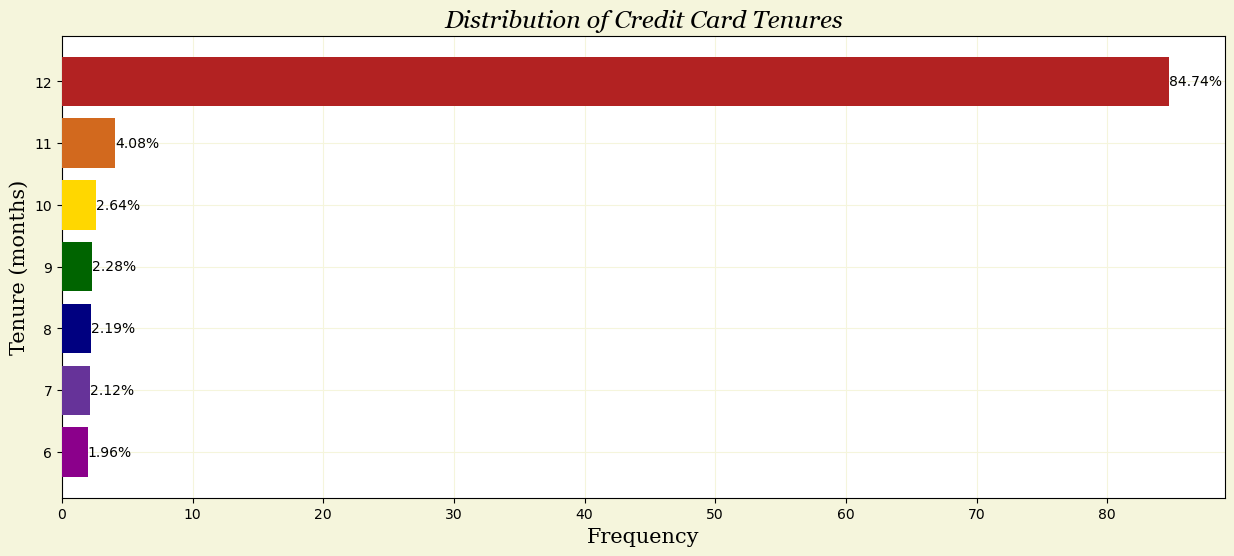

In [114]:
# data
x = df['TENURE'].value_counts().sort_values(ascending = False)
x_percent = cal_percentage(x)
y = x.index.sort_values(ascending = False)

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
colours = ('firebrick', 'chocolate', 'gold', 'darkgreen', 'navy', 'rebeccapurple', 'darkmagenta')
fig.patch.set_facecolor('beige')
ax.grid(visible = True, color = 'beige', zorder = 0)

# plot
bars = ax.barh(y, x_percent, color = colours, zorder = 3)
ax.bar_label(bars, fmt='%.2f%%')
ax.set_ylabel('Tenure (months)', fontdict = font_label)
ax.set_xlabel('Frequency', fontdict = font_label)
ax.set_title('Distribution of Credit Card Tenures', fontdict = font_title)

# show plot
plt.show()

### 2) PRC_FULL_PAYMENT

Range of (0,1), assuming 0 represents never pay in full, and 1 represents always pay in full

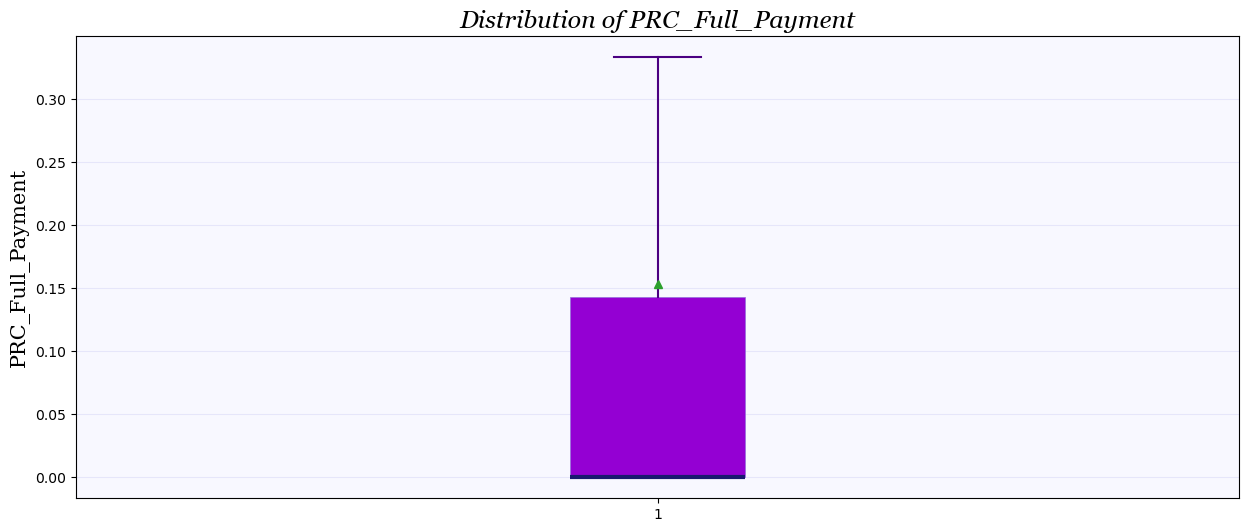

In [115]:
# data
distribution = df['PRC_FULL_PAYMENT']

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
ax.set_facecolor('ghostwhite')
ax.grid(visible = True, color = 'lavender', zorder = 0, axis = 'y')

# plot
ax.boxplot(distribution,
           patch_artist=True,
           showmeans = True, 
           showfliers=False, 
           medianprops={"color": "midnightblue", "linewidth": 3.0},
           boxprops={"facecolor": "darkviolet", "edgecolor": "mediumpurple", "linewidth": 0.5},
           whiskerprops={"color": "indigo", "linewidth": 1.5},
           capprops={"color": "indigo", "linewidth": 1.5})
ax.set_ylabel('PRC_Full_Payment', fontdict = font_label)
ax.set_title('Distribution of PRC_Full_Payment', fontdict = font_title)

plt.show()

### 3) MINIMUM PAYMENT

visualise percentage amount that needs to be paid back evey biling cycle 

In [116]:
# Special Handling
# df['CREDIT_LIMIT'].fillna(value = 1000.00, inplace = True)
# df['MINIMUM_PAYMENTS'].fillna(value = 0, inplace = True)

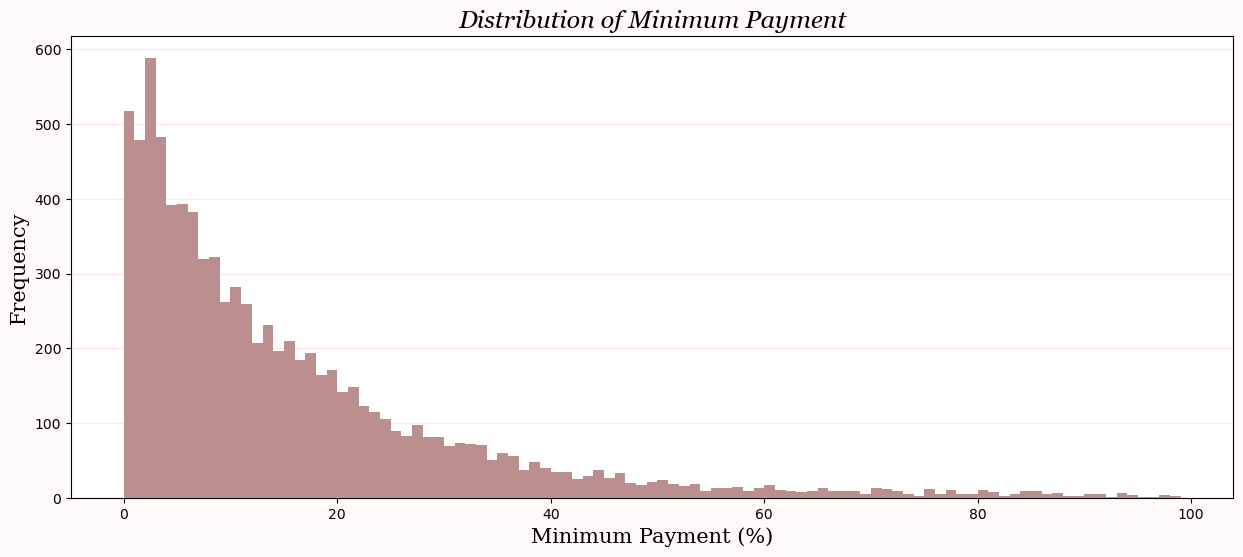

In [117]:
# data
percentage_min_payment = df['MINIMUM_PAYMENTS'] / df['CREDIT_LIMIT'] * 100 
bin = np.arange(0.0, 100.0, 1.0)

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
fig.patch.set_facecolor('snow')
ax.grid(visible = True, color = 'mistyrose', zorder = 0, axis='y')


# plot
ax.hist(percentage_min_payment, bins = bin, color = 'rosybrown', zorder = 3)
ax.set_xlabel('Minimum Payment (%)', fontdict = font_label)
ax.set_ylabel('Frequency', fontdict = font_label)
ax.set_title('Distribution of Minimum Payment', fontdict = font_title)

# show plot
plt.show()

### 4) Credit Limit

visualise how credit limit relate to tenure

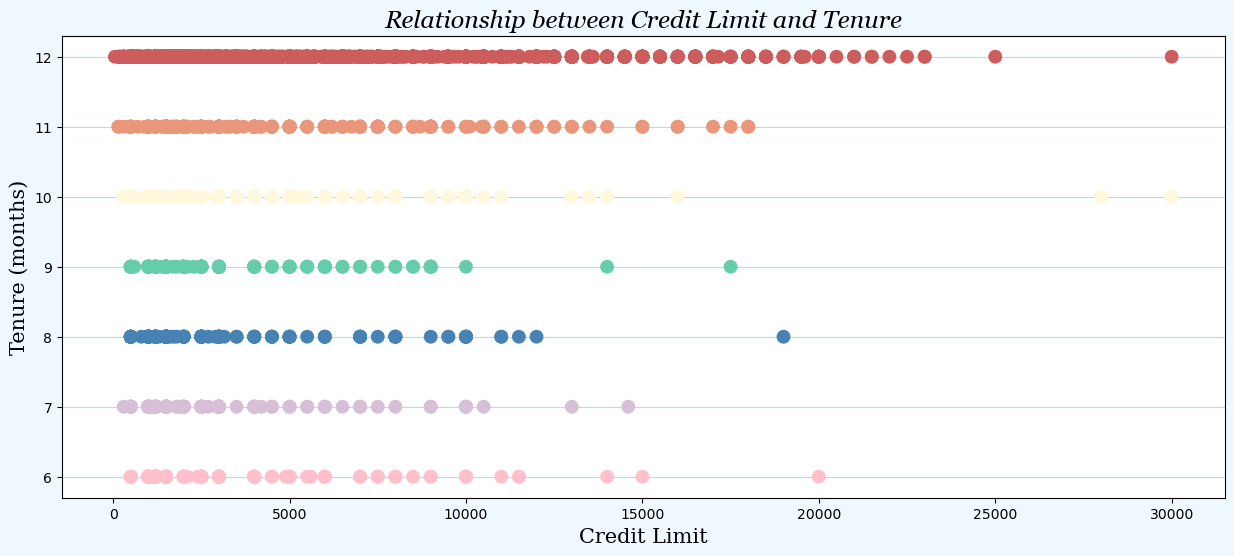

In [37]:
# data
x = df['CREDIT_LIMIT']
y = df['TENURE']

# construct color list for different tenure value
colors = []
for value in y:
    if value == 12:
        colors.append('indianred')
    elif value == 11:
        colors.append('darksalmon')
    elif value == 10:
        colors.append('cornsilk')
    elif value == 9:
        colors.append('mediumaquamarine')
    elif value == 8:
        colors.append('steelblue')
    elif value == 7:
        colors.append('thistle')
    else:
        colors.append('pink')

# plot
plt.figure(figsize = fig_size).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c=colors, zorder = 3, s=80)
plt.xlabel('Credit Limit', fontdict = font_label)
plt.ylabel('Tenure (months)', fontdict = font_label)
plt.title('Relationship between Credit Limit and Tenure', fontdict = font_title)

# configure
plt.gca().grid(visible = True, color = 'powderblue', zorder = 1, axis='y')

# show
plt.show()

### 5) ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES

PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES

In [38]:
def calculate_count(a, b):
    a_count = 0
    b_count = 0

    for index, row in df.iterrows():
        if row[a] > row[b]:
            a_count += 1
        else:
            b_count += 1

    return a_count, b_count

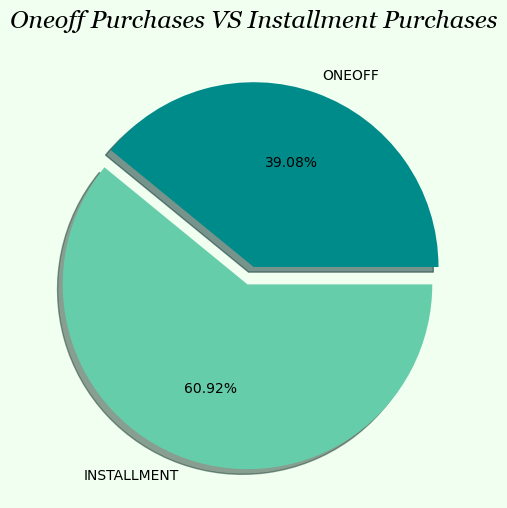

In [39]:
# visualise either more people spend money on pneoff or installment

# data
oneoff_count, installment_count = calculate_count('ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES')
count = [oneoff_count, installment_count]

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
labels = ['ONEOFF', 'INSTALLMENT']
explode = (0, 0.1)
fig.patch.set_facecolor('honeydew')

# plot
ax.pie(count, labels = labels, autopct = '%1.2f%%', colors=['darkcyan', 'mediumaquamarine'], explode = explode, shadow = True)
ax.set_title('Oneoff Purchases VS Installment Purchases', fontdict = font_title)

# plot
plt.show()

### 6) PURCHASES, CASH ADVANCES

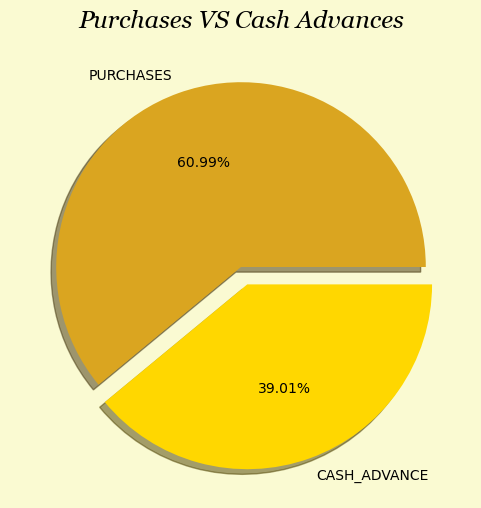

In [42]:
# visualise either more people use credit card on purchases or cash advance

# data
purchases_count, ca_count = calculate_count('PURCHASES', 'CASH_ADVANCE')
count = [purchases_count, ca_count]

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
labels = ['PURCHASES', 'CASH_ADVANCE']
explode = (0, 0.1)
fig.patch.set_facecolor('lightgoldenrodyellow')

# plot
ax.pie(count, labels = labels, autopct = '%1.2f%%', colors=['goldenrod', 'gold'], explode = explode, shadow = True)
ax.set_title('Purchases VS Cash Advances', fontdict = font_title)

# plot
plt.show()

### 7) PURCHASES_TRX, CASH_ADVANCE_TRX

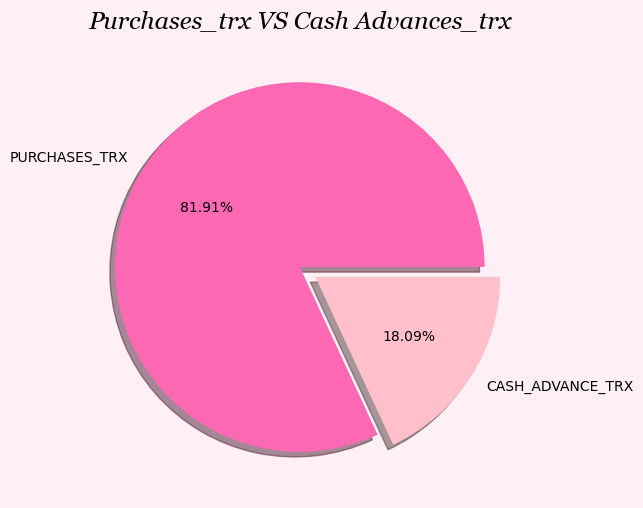

In [46]:
# visualise either more people use credit card on purchases or cash advance

# data
purchases_trx_count, ca_trx_count = sum(df['PURCHASES_TRX']), sum(df['CASH_ADVANCE_TRX'])
count = [purchases_trx_count, ca_trx_count]

# create figure
fig, ax = plt.subplots(figsize = fig_size)

# configure properties
labels = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']
explode = (0, 0.1)
fig.patch.set_facecolor('lavenderblush')

# plot
ax.pie(count, labels = labels, autopct = '%1.2f%%', colors=['hotpink', 'pink'], explode = explode, shadow = True)
ax.set_title('Purchases_trx VS Cash Advances_trx', fontdict = font_title)

# plot
plt.show()